In [1]:
import pandas as pd
import numpy as np

dataset1 = pd.read_csv("student-mat.csv")#reading the csv file and converting it to pandas dataframe
dataset2 = pd.read_csv("student-por.csv")
#checking if the number of columns and the column name match in two dataframes or not
set1 = set(dataset1.columns)
set2 = set(dataset2.columns)
print(f"dataset 1 size:{dataset1.shape}")
print(f"dataset 1 size:{dataset2.shape}")
print("Columns only in dataset1:", set1 - set2)#no columns found which is only present in dataset1
print("Columns only in dataset2:", set2 - set1)#no columns found which is only present in dataset2
print("Common columns:", set1 & set2)# all of the columns match in both of the dataframes

dataset 1 size:(395, 33)
dataset 1 size:(649, 33)
Columns only in dataset1: set()
Columns only in dataset2: set()
Common columns: {'Mjob', 'famsize', 'age', 'Medu', 'Pstatus', 'health', 'reason', 'famrel', 'schoolsup', 'sex', 'traveltime', 'romantic', 'paid', 'failures', 'G2', 'famsup', 'Dalc', 'goout', 'G3', 'school', 'Walc', 'studytime', 'G1', 'address', 'Fjob', 'higher', 'nursery', 'guardian', 'Fedu', 'absences', 'freetime', 'activities', 'internet'}


In [2]:
mergeddf = pd.concat([dataset1, dataset2], ignore_index=True)#merging two dataframes
print(mergeddf.shape)# there are total 1044 rows and 33 columns in the new merged dataframe


(1044, 33)


In [3]:
display(mergeddf)#displaying the dataframe
mergeddf.info()#checking non-null count and the datatype for all columns of the dataset 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
1042,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [4]:
notnumeric = mergeddf.select_dtypes(include = ['object']).columns
print(notnumeric)

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


In [5]:
notnumeric_dict = {}
for col in notnumeric:
    notnumeric_dict[col]= mergeddf[col].unique()
    print(col ,notnumeric_dict[col])

school ['GP' 'MS']
sex ['F' 'M']
address ['U' 'R']
famsize ['GT3' 'LE3']
Pstatus ['A' 'T']
Mjob ['at_home' 'health' 'other' 'services' 'teacher']
Fjob ['teacher' 'other' 'services' 'health' 'at_home']
reason ['course' 'other' 'home' 'reputation']
guardian ['mother' 'father' 'other']
schoolsup ['yes' 'no']
famsup ['no' 'yes']
paid ['no' 'yes']
activities ['no' 'yes']
nursery ['yes' 'no']
higher ['yes' 'no']
internet ['no' 'yes']
romantic ['no' 'yes']


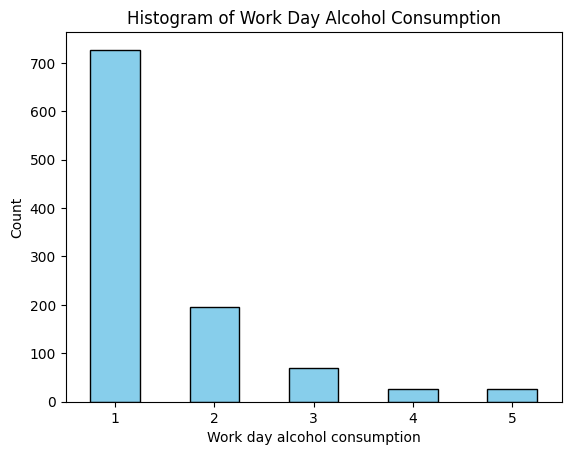

In [6]:
import matplotlib.pyplot as plt
mergeddf['Dalc'].value_counts().sort_index().plot(kind="bar",rot = 0, color = "skyblue",edgecolor = "black")
plt.xlabel("Work day alcohol consumption")
plt.ylabel("Count")
plt.title("Histogram of Work Day Alcohol Consumption")
plt.show()

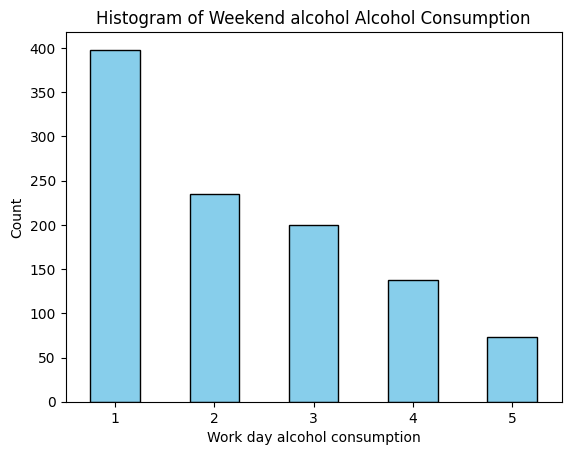

In [7]:
import matplotlib.pyplot as plt
mergeddf['Walc'].value_counts().sort_index().plot(kind="bar",rot = 0, color = "skyblue",edgecolor = "black")
plt.xlabel("Work day alcohol consumption")
plt.ylabel("Count")
plt.title("Histogram of Weekend alcohol Alcohol Consumption")
plt.show()

Text(0.5, 1.0, 'Barchart of grade distribution ')

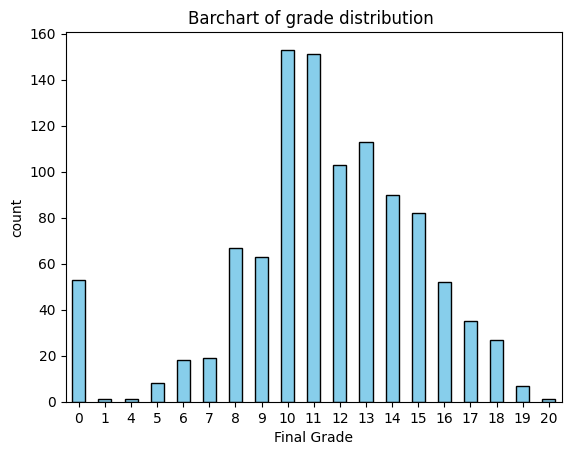

In [8]:
mergeddf["G3"].value_counts().sort_index().plot(kind = "bar", rot = 0, color="skyblue" , edgecolor= "black")
plt.xlabel("Final Grade")
plt.ylabel("count")
plt.title("Barchart of grade distribution ")

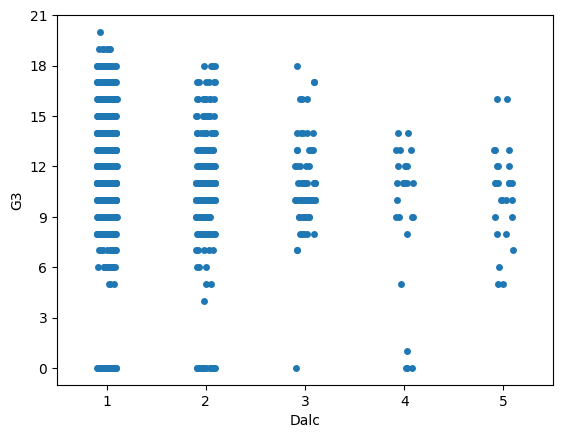

In [9]:
import seaborn as sns
from matplotlib.ticker import MaxNLocator
sns.stripplot(x=mergeddf["Dalc"], y=mergeddf["G3"], data=mergeddf, jitter=True)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

In [10]:
mergeddf["G3"].unique()

array([ 6, 10, 15, 11, 19,  9, 12, 14, 16,  5,  8, 17, 18, 13, 20,  7,  0,
        4,  1])

In [11]:
mergeddf["goout_degree"] = np.where(mergeddf["goout"] > 3, "high", "low")

In [12]:
mergeddf["alc_level"] = np.where(((mergeddf["Dalc"]+mergeddf["Walc"])/2)> 3,"High","Low")

In [13]:
mergeddf["freetime_degree"] = np.where(mergeddf["freetime"] > 3, "high", "low")
mergeddf["health_degree"] = np.where(mergeddf["health"] > 3, "high", "low")
mergeddf["famrel_degree"] = np.where(mergeddf["famrel"] > 3, "high", "low")


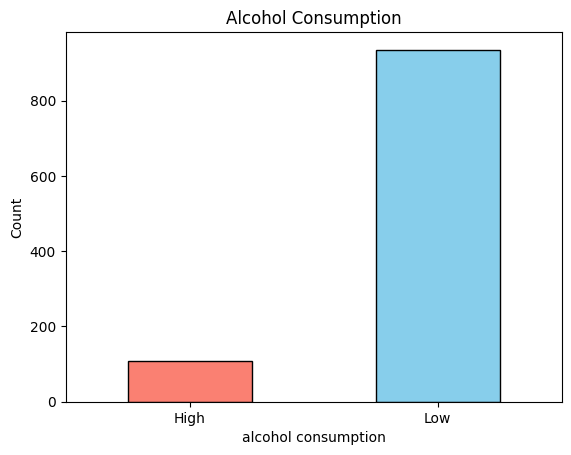

In [14]:
mergeddf['alc_level'].value_counts().sort_index().plot(kind="bar",rot = 0, color = ["salmon","skyblue"],edgecolor = "black")
plt.xlabel("alcohol consumption")
plt.ylabel("Count")
plt.title("Alcohol Consumption")
plt.show()

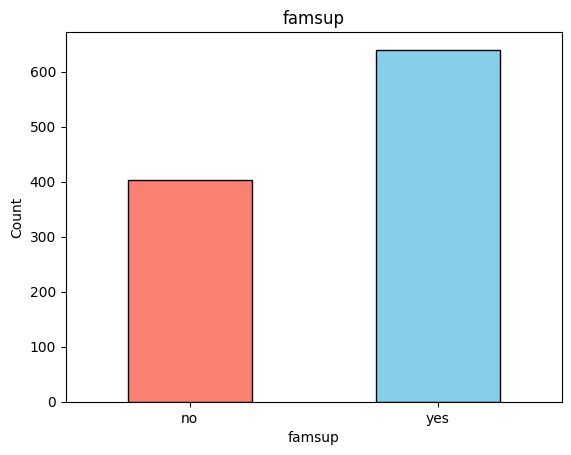

In [15]:
mergeddf['famsup'].value_counts().sort_index().plot(kind="bar",rot = 0, color = ["salmon","skyblue"],edgecolor = "black")
plt.xlabel("famsup")
plt.ylabel("Count")
plt.title("famsup")
plt.show()


In [16]:
features = ['famsup', 'goout_degree', 'activities', 'health_degree', 'freetime_degree', 'internet', 'famrel_degree']
for i in features:
        ct = pd.crosstab(mergeddf['alc_level'], mergeddf[i])        # counts
        ct_row = ct.div(ct.sum(1), axis=0)                                  # row %
        print(ct); print(ct_row.round(3))
        print("_________________________")


famsup      no  yes
alc_level          
High        52   57
Low        352  583
famsup        no    yes
alc_level              
High       0.477  0.523
Low        0.376  0.624
_________________________
goout_degree  high  low
alc_level              
High            75   34
Low            315  620
goout_degree   high    low
alc_level                 
High          0.688  0.312
Low           0.337  0.663
_________________________
activities   no  yes
alc_level           
High         51   58
Low         477  458
activities     no    yes
alc_level               
High        0.468  0.532
Low         0.510  0.490
_________________________
health_degree  high  low
alc_level               
High             70   39
Low             499  436
health_degree   high    low
alc_level                  
High           0.642  0.358
Low            0.534  0.466
_________________________
freetime_degree  high  low
alc_level                 
High               63   46
Low               338  597
freetime_deg

In [17]:
ct = pd.crosstab(mergeddf['alc_level'], mergeddf['famsup'])        # counts
ct_row = ct.div(ct.sum(1), axis=0)                                  # row %
print(ct); print(ct_row.round(3))


famsup      no  yes
alc_level          
High        52   57
Low        352  583
famsup        no    yes
alc_level              
High       0.477  0.523
Low        0.376  0.624


In [18]:
ct = pd.crosstab(mergeddf['alc_level'], mergeddf['goout_degree'])        # counts
ct_row = ct.div(ct.sum(1), axis=0)                                  # row %
print(ct); print(ct_row.round(3))

goout_degree  high  low
alc_level              
High            75   34
Low            315  620
goout_degree   high    low
alc_level                 
High          0.688  0.312
Low           0.337  0.663


In [19]:
featureset= ['famsup', 'goout_degree',]

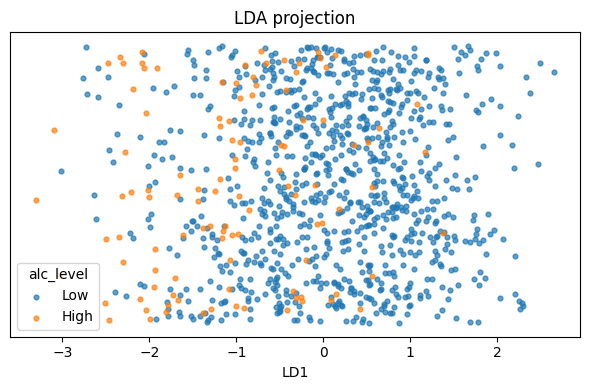

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# --- config ---
target = "alc_level"              # your label column ("High"/"Low")
order  = ["Low", "High"]          # draw order (optional)

# --- X, y (numeric features only) ---
y = mergeddf[target]
X = mergeddf.select_dtypes(include="number").drop(columns=[target,"Dalc","Walc"], errors="ignore")

# handle missing values (simple): drop rows with any NaN in X or y
mask = X.notna().all(axis=1) & y.notna()
X, y = X.loc[mask], y.loc[mask]

# --- scale + LDA ---
Xs = StandardScaler().fit_transform(X)
classes = np.unique(y)
n_comp = max(1, min(2, len(classes) - 1))   # LDA can do at most K-1 components
lda = LDA(n_components=n_comp)
Z = lda.fit_transform(Xs, y)

# --- plotting ---
plt.figure(figsize=(6,4))
if n_comp == 2:
    # 2D scatter
    for cls in (order if set(order)==set(classes) else classes):
        m = (y.values == cls)
        plt.scatter(Z[m,0], Z[m,1], s=12, alpha=0.7, label=str(cls))
    plt.xlabel("LD1"); plt.ylabel("LD2")
else:
    # only 1 discriminant for binary classes -> 1D strip plot
    jitter = (np.random.rand(len(Z)) - 0.5) * 0.02
    y0 = np.zeros(len(Z)) + jitter
    for cls in (order if set(order)==set(classes) else classes):
        m = (y.values == cls)
        plt.scatter(Z[m,0], y0[m], s=12, alpha=0.7, label=str(cls))
    plt.yticks([]); plt.xlabel("LD1"); plt.ylabel("")

plt.title("LDA projection")
plt.legend(title=target)
plt.tight_layout(); plt.show()


goout        -0.662838
G2           -0.480156
G1            0.468080
studytime     0.332574
traveltime   -0.289384
health       -0.239231
Medu         -0.227454
famrel        0.205050
absences     -0.186084
freetime     -0.159035
dtype: float64


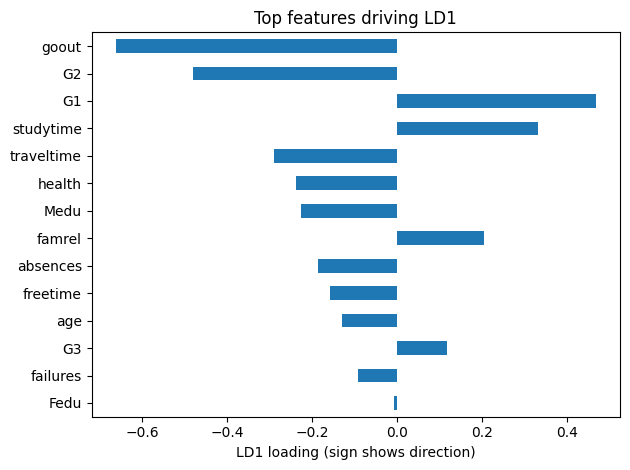

LD1 mean by class: {'High': np.float64(-1.0328789845086794), 'Low': np.float64(0.12041049124218973)}


In [21]:
# LDA loadings: weight of each feature in LD1
loadings = pd.Series(lda.scalings_.ravel(), index=X.columns)

# sort by absolute importance
top = loadings.reindex(loadings.abs().sort_values(ascending=False).index)
print(top.head(10))  # top 10 features

# (optional) bar plot of top features
top_k = 15
ax = top.head(top_k).iloc[::-1].plot(kind="barh")  # reverse for nicer order
ax.set_xlabel("LD1 loading (sign shows direction)")
ax.set_title("Top features driving LD1")
plt.tight_layout(); plt.show()

# (optional) which class is on the positive side of LD1?
means_by_class = {cls: Z[y.values==cls, 0].mean() for cls in classes}
print("LD1 mean by class:", means_by_class)
# Features with positive loadings push toward the class with the higher LD1 mean; negative toward the other.


In [22]:
mergeddf["failures"].unique()

array([0, 3, 2, 1])

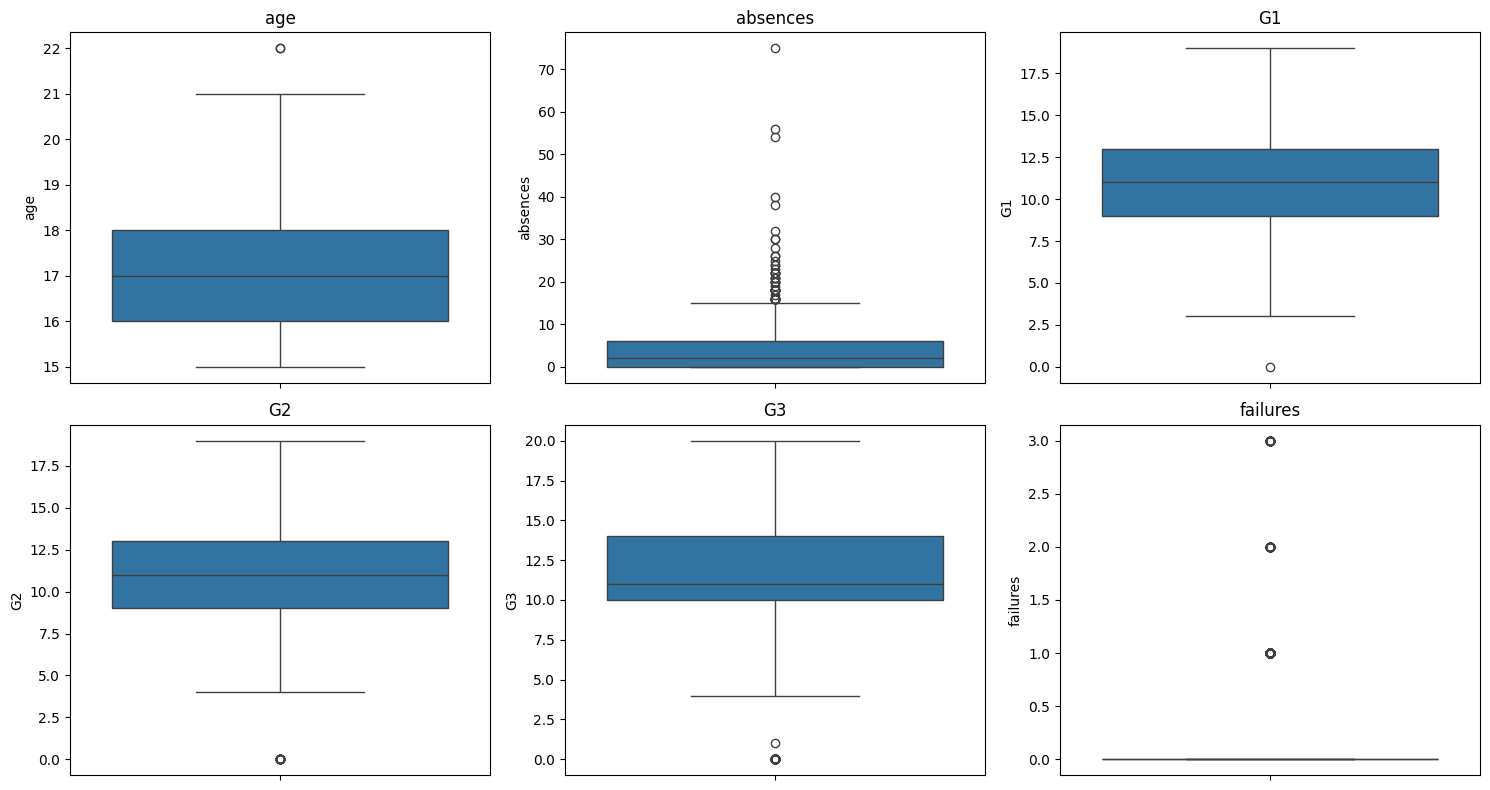

In [23]:
# Numerical features
num_features = ["age", "absences", "G1", "G2", "G3","failures"]
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_features, 1):
    if col in mergeddf.columns:
        plt.subplot(2, 3, i)
        sns.boxplot(y=mergeddf[col])
        plt.title(f"{col}")
plt.tight_layout()
plt.show()

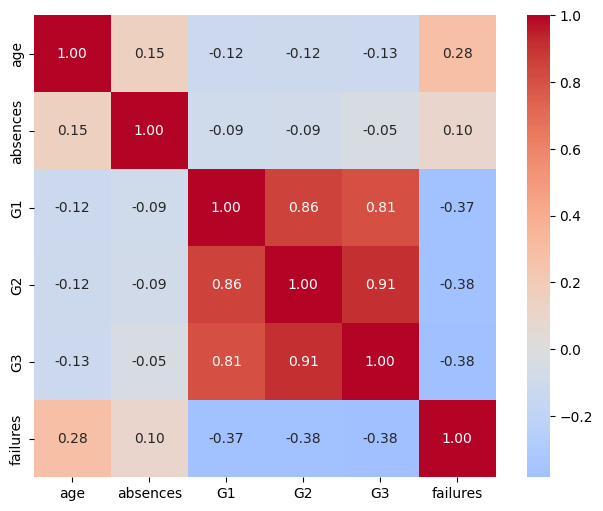

In [24]:

corr = mergeddf[num_features].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, square=True)
plt.show()

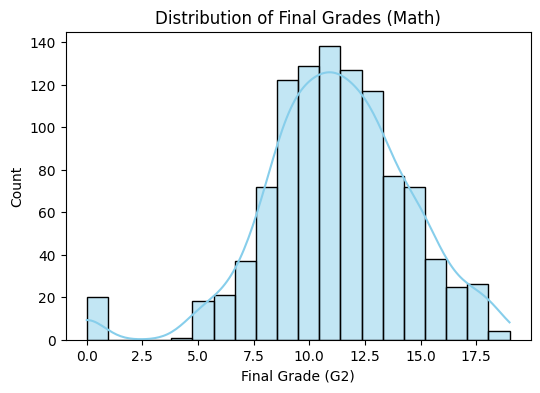

In [25]:

plt.figure(figsize=(6,4))
sns.histplot(mergeddf['G2'], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Final Grades (Math)")
plt.xlabel("Final Grade (G2)")
plt.ylabel("Count")
plt.show()



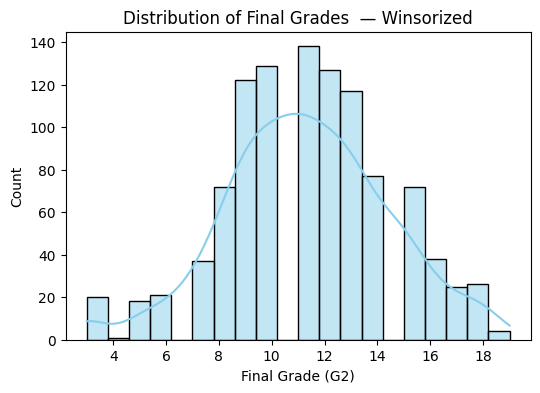

In [26]:
g2 = mergeddf['G2'].copy()
Q1 = g2.quantile(0.25)
Q3 = g2.quantile(0.75)
IQR = Q3 - Q1
lo = Q1 - 1.5*IQR
hi = Q3 + 1.5*IQR

mergeddf_win = mergeddf.copy()
mergeddf_win['G2'] = mergeddf_win['G2'].clip(lower=lo, upper=hi)

plt.figure(figsize=(6,4))
sns.histplot(mergeddf_win['G2'], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Final Grades  — Winsorized")
plt.xlabel("Final Grade (G2)")
plt.ylabel("Count")
plt.show()


In [27]:
print(mergeddf_win.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   school           1044 non-null   object
 1   sex              1044 non-null   object
 2   age              1044 non-null   int64 
 3   address          1044 non-null   object
 4   famsize          1044 non-null   object
 5   Pstatus          1044 non-null   object
 6   Medu             1044 non-null   int64 
 7   Fedu             1044 non-null   int64 
 8   Mjob             1044 non-null   object
 9   Fjob             1044 non-null   object
 10  reason           1044 non-null   object
 11  guardian         1044 non-null   object
 12  traveltime       1044 non-null   int64 
 13  studytime        1044 non-null   int64 
 14  failures         1044 non-null   int64 
 15  schoolsup        1044 non-null   object
 16  famsup           1044 non-null   object
 17  paid             1044 non-null   

In [28]:
mergeddf_win = mergeddf_win.drop(['goout','Dalc','Walc','freetime','health','famrel'],axis = 1)


In [33]:
print(mergeddf_win.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   school           1044 non-null   object
 1   sex              1044 non-null   object
 2   age              1044 non-null   int64 
 3   address          1044 non-null   object
 4   famsize          1044 non-null   object
 5   Pstatus          1044 non-null   object
 6   Medu             1044 non-null   int64 
 7   Fedu             1044 non-null   int64 
 8   Mjob             1044 non-null   object
 9   Fjob             1044 non-null   object
 10  reason           1044 non-null   object
 11  guardian         1044 non-null   object
 12  traveltime       1044 non-null   int64 
 13  studytime        1044 non-null   int64 
 14  failures         1044 non-null   int64 
 15  schoolsup        1044 non-null   object
 16  famsup           1044 non-null   object
 17  paid             1044 non-null   

In [40]:
print(mergeddf_win['alc_level'].unique())

['Low' 'High']


In [37]:
mergeddf_win.to_csv("student_alcohol_data_for_mlp.csv",index=False)

In [38]:
import os
os.listdir()

['.ipynb_checkpoints',
 'eda.ipynb',
 'machinelearning2025.ipynb',
 'midpointreport.ipynb',
 'mlruns',
 'student-mat.csv',
 'student-por.csv',
 'student_alcohol_data_for_mlp',
 'student_alcohol_data_for_mlp.csv']

In [36]:

import os, tempfile
import numpy as np
import pandas as pd
import mlflow, mlflow.sklearn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

# ===== MLflow setup =====
mlflow.set_experiment("student-grades")
mlflow.sklearn.autolog(log_models=True, log_input_examples=True)


with mlflow.start_run(run_name="LinearRegression_G2_only"):

    features = ["avg_exam"]   
    target = "G3"

    # build df (avoid undefined required_cols)
    df = mergeddf_win.copy()
    df["avg_exam"] = df[["G1", "G2"]].mean(axis=1)  

    # (optional) record which features you used
    mlflow.log_param("features", features)
    mlflow.log_param("target", target)
    mlflow.log_param("test_size", 0.2)
    mlflow.log_param("random_state", 0)
    mlflow.log_param("kfold_splits", 5)

    X = df[features].values
    y = df[target].values

    #  Train / Test split 
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=0, shuffle=True
    )

   
    model = LinearRegression()
    model.fit(X_train, y_train)

  
    kfold = KFold(n_splits=5, shuffle=True, random_state=0)
    cv_r2   = cross_val_score(model, X_train, y_train, scoring="r2", cv=kfold)
    cv_rmse = -cross_val_score(model, X_train, y_train, scoring="neg_root_mean_squared_error", cv=kfold)
    cv_mae  = -cross_val_score(model, X_train, y_train, scoring="neg_mean_absolute_error", cv=kfold)

 
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    print("Test metrics")
    print(f"R^2 (accuracy): {r2:.4f}")
    print(f"RMSE:           {rmse:.4f}")
    print(f"MAE:            {mae:.4f}")

    print("\n5-fold CV on TRAIN (mean ± std)")
    print(f"R^2:  {cv_r2.mean():.4f} ± {cv_r2.std():.4f}")
    print(f"RMSE: {cv_rmse.mean():.4f}")
    print(f"MAE:  {cv_mae.mean():.4f}")

    print("\nCoefficients:")
    for name, coef in zip(features, model.coef_):
        print(f"{name:>9}: {coef:.4f}")
    print(f"Intercept: {model.intercept_:.4f}")

    
    mlflow.log_metric("r2_test", r2)
    mlflow.log_metric("rmse_test", rmse)
    mlflow.log_metric("mae_test", mae)
    mlflow.log_metric("cv_r2_mean",  float(cv_r2.mean()))
    mlflow.log_metric("cv_r2_std",   float(cv_r2.std()))
    mlflow.log_metric("cv_rmse_mean",float(cv_rmse.mean()))
    mlflow.log_metric("cv_mae_mean", float(cv_mae.mean()))

 



Test metrics
R^2 (accuracy): 0.7607
RMSE:           1.4989
MAE:            1.0435

5-fold CV on TRAIN (mean ± std)
R^2:  0.7846 ± 0.0341
RMSE: 1.8611
MAE:  1.2244

Coefficients:
 avg_exam: 1.1951
Intercept: -2.1966


AttributeError: module 'mlflow.sklearn' has no attribute 'eval_and_log_metrics'

In [37]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

features = [ "G2"]
target = "G3"


df = mergeddf_win.copy()
df["avg_exam"] = df[["G1","G2"]].mean(axis=1) 

X = df[features].values
y = df[target].values

#  Train / Test split 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, shuffle=True
)

# Fit model 
model = LinearRegression()
model.fit(X_train, y_train)

# 5-fold cross-validation on full data 
kfold = KFold(n_splits=5, shuffle=True, random_state= 0)
cv_r2   = cross_val_score(model, X_train, y_train, scoring="r2", cv=kfold)
cv_rmse = -cross_val_score(model, X_train, y_train, scoring="neg_root_mean_squared_error", cv=kfold)
cv_mae  = -cross_val_score(model, X_train, y_train, scoring="neg_mean_absolute_error", cv=kfold)

#  Evaluate on test set 
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("Test metrics")
print(f"R^2 (accuracy): {r2:.4f}")
print(f"RMSE:           {rmse:.4f}")
print(f"MAE:            {mae:.4f}")

print("\n5-fold CV (mean ± std)")
print(f"R^2:  {cv_r2.mean():.4f} ± {cv_r2.std():.4f}")
print(f"RMSE: {cv_rmse.mean():.4f}")
print(f"MAE:  {cv_mae.mean():.4f}")


print("\nCoefficients:")
for name, coef in zip(features, model.coef_):
    print(f"{name:>9}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")


results = {
    "model": model,
    "features": features,
    "test_metrics": {"r2": r2, "rmse": rmse, "mae": mae},
    "cv_metrics": {"r2_mean": cv_r2.mean(), "r2_std": cv_r2.std(),
                   "rmse_mean": cv_rmse.mean(), "mae_mean": cv_mae.mean()},
    "X_train": X_train, "X_test": X_test, "y_train": y_train, "y_test": y_test
}


2025/11/02 19:40:40 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '4490c03a4d594d89bbd6487334e7d89f', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


Test metrics
R^2 (accuracy): 0.8215
RMSE:           1.2946
MAE:            0.8621

5-fold CV (mean ± std)
R^2:  0.8217 ± 0.0378
RMSE: 1.6887
MAE:  1.0589

Coefficients:
       G2: 1.1487
Intercept: -1.6992


In [ ]:
residuals = y_test - y_pred
predicted = y_pred

plt.figure()
plt.scatter(predicted, residuals, alpha=0.7)
plt.axhline(0.0, linestyle="--")
plt.xlabel("Predicted G3")
plt.ylabel("Residuals (y_true - y_pred)")
plt.title("Residuals vs. Predicted — LinearRegression")
plt.show()

# ---------- Plot B: Residual Histogram ----------
plt.figure()
plt.hist(residuals, bins=30)
plt.xlabel("Residuals (y_true - y_pred)")
plt.ylabel("Count")
plt.title("Residual Histogram — LinearRegression")
plt.show()


print("\nResiduals summary:")
print(f"Mean: {residuals.mean():.4f}, Std: {residuals.std(ddof=1):.4f}, "
      f"Min: {residuals.min():.4f}, Max: {residuals.max():.4f}")

In [ ]:

from sklearn.tree import DecisionTreeRegressor



features =  ["G2"]
target = "G3"


X = df[features].values
y = df[target].values


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=0
)

# --- 3) Fit model ---
regr = DecisionTreeRegressor(
    criterion="squared_error",  
    max_depth=3,             
    min_samples_split=2,
    min_samples_leaf=10,
    random_state=0             
)
regr.fit(X_train, y_train)

# --- 4) Evaluate on test set ---
y_pred = regr.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("Test metrics (regression)")
print(f"R^2:   {r2:.4f}")
print(f"RMSE:  {rmse:.4f}")
print(f"MAE:   {mae:.4f}")

# --- 5) 5-fold cross-validation on full data ---
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
cv_r2   = cross_val_score(regr, X_train, y_train, scoring="r2", cv=kfold)
cv_rmse = -cross_val_score(regr, X_train, y_train, scoring="neg_root_mean_squared_error", cv=kfold)
cv_mae  = -cross_val_score(regr, X_train, y_train, scoring="neg_mean_absolute_error", cv=kfold)

print("\n5-fold CV (mean ± std)")
print(f"R^2:  {cv_r2.mean():.4f} ± {cv_r2.std():.4f}")
print(f"RMSE: {cv_rmse.mean():.4f}")
print(f"MAE:  {cv_mae.mean():.4f}")


print("\nFeature importances:")
for name, imp in zip(features, regr.feature_importances_):
    print(f"{name:>9}: {imp:.4f}")


results_reg = {
    "model": regr,
    "features": features,
    "test_metrics": {"r2": r2, "rmse": rmse, "mae": mae},
    "cv_metrics": {"r2_mean": cv_r2.mean(), "r2_std": cv_r2.std(),
                   "rmse_mean": cv_rmse.mean(), "mae_mean": cv_mae.mean()},
    "X_train": X_train, "X_test": X_test, "y_train": y_train, "y_test": y_test
}


In [ ]:

import numpy as np, pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report, confusion_matrix
)
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE


df = mergeddf.copy()
cat_feats = ["famsup","goout_degree","activities","health_degree","freetime_degree","internet","famrel_degree"]
df["alc_level_bin"] = (df["alc_level"].str.lower() == "high").astype(int)
X = df[cat_feats]; y = df["alc_level_bin"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)


pre = ColumnTransformer(
    [("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_feats)]
)

pipe = Pipeline(steps=[
    ("pre", pre),
    ("smote", SMOTE(random_state=42)),
    ("clf", LogisticRegression(max_iter=2000, solver="lbfgs", random_state=42))
])


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_validate(
    pipe, X_train, y_train, cv=cv, n_jobs=-1,
    scoring={"accuracy":"accuracy","f1":"f1"}
)
print(f"CV Accuracy: {cv_scores['test_accuracy'].mean():.3f} ± {cv_scores['test_accuracy'].std():.3f}")
print(f"CV F1:       {cv_scores['test_f1'].mean():.3f} ± {cv_scores['test_f1'].std():.3f}")


pipe.fit(X_train, y_train)

proba  = pipe.predict_proba(X_test)[:, 1]   
pred05 = (proba >= 0.5).astype(int)

print("\nTEST Accuracy (0.5):", accuracy_score(y_test, pred05))
print("TEST F1 (0.5):      ", f1_score(y_test, pred05))
print("\nConfusion matrix:\n", confusion_matrix(y_test, pred05))
print("\nClassification report:\n", classification_report(y_test, pred05, digits=3))


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


labels = [0, 1]                   
cm  = confusion_matrix(y_test, pred05, labels=labels)
cmn = confusion_matrix(y_test, pred05, labels=labels, normalize="true")

print("Confusion matrix (counts):\n", cm)
print("\nConfusion matrix (row-normalized):\n", cmn)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low","High"])
disp.plot()


In [ ]:


import numpy as np, pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE


df = mergeddf.copy()
cat_feats = ["famsup","goout_degree","activities","health_degree","freetime_degree","internet","famrel_degree"]

0
df["alc_level_bin"] = (df["alc_level"].str.lower() == "high").astype(int)
X = df[cat_feats]
y = df["alc_level_bin"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

# ----- Pipeline: OneHot -> SMOTE (train only) -> Decision Tree -----
pre = ColumnTransformer([("cat", OneHotEncoder(handle_unknown="ignore"), cat_feats)])
pipe = Pipeline([
    ("pre", pre),
    ("smote", SMOTE(random_state=42)),           
    ("clf", DecisionTreeClassifier(random_state=42))
])


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_validate(
    pipe, X_train, y_train, cv=cv, n_jobs=-1,
    scoring={"accuracy":"accuracy","f1":"f1"}
)
print(f"CV Accuracy: {cv_scores['test_accuracy'].mean():.3f} ± {cv_scores['test_accuracy'].std():.3f}")
print(f"CV F1:       {cv_scores['test_f1'].mean():.3f} ± {cv_scores['test_f1'].std():.3f}")


pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print("\nTEST Accuracy:", accuracy_score(y_test, y_pred))
print("TEST F1:      ", f1_score(y_test, y_pred))
print("\nClassification report:\n",
      classification_report(y_test, y_pred, target_names=["Low","High"]))


cm = confusion_matrix(y_test, y_pred, labels=[0,1])
print("Confusion matrix (counts):\n", cm)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Counts
labels = [0, 1]  # 0=Low, 1=High
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low","High"])
fig, ax = plt.subplots(figsize=(5,4))
disp.plot(ax=ax, colorbar=True)
ax.set_title("Confusion Matrix (Counts)")
plt.tight_layout()
plt.show()


